In [18]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [19]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "/Users/endriasa//Projects/FYS4150/src/Project2/Results"
FIGURE_ID = "Results/Figures"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", dpi=100,pad_inches=0.0,transparent=False, bbox_inches='tight',format='png')

In [20]:
size    = np.arange(10, 260, 10)
nrho    = 4
nomg    = 4
n       = np.zeros(np.size(size)*nrho*nomg)
n_rot   = np.zeros(np.size(size)*nrho*nomg)
tim_arm = np.zeros(np.size(size)*nrho*nomg)
tim_jac = np.zeros(np.size(size)*nrho*nomg)

with open(data_path("Time_file_2el.txt"), "r") as results:
        for line_num, line_string in enumerate(results):
            words = line_string.split()
            n[line_num]       = float(words[2])
            n_rot[line_num]   = float(words[7])
            tim_arm[line_num] = float(words[11])
            tim_jac[line_num] = float(words[15])
            
n       = n.reshape(np.size(size)*nrho*nomg,1)   
n       = n[0:np.size(size)*nrho*nomg:nrho*nomg]
n_rot   = n_rot.reshape(np.size(size)*nrho*nomg,1)
n_rot   = n_rot[0:np.size(size)*nrho*nomg:nrho*nomg]
tim_arm = tim_arm.reshape(np.size(size)*nrho*nomg,1)
tim_arm = tim_arm[0:np.size(size)*nrho*nomg:nrho*nomg]
tim_jac = tim_jac.reshape(np.size(size)*nrho*nomg,1)
tim_jac = tim_jac[0:np.size(size)*nrho*nomg:nrho*nomg]


[[ 0.         -3.36519509  1.82261761]]


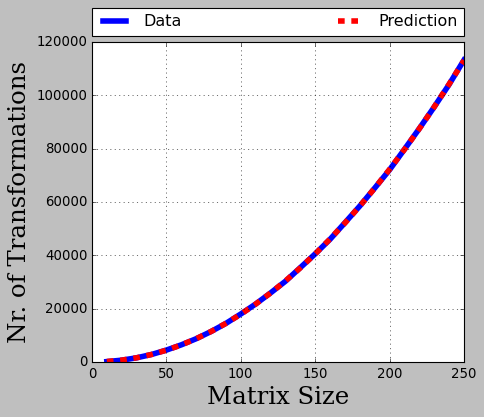

<Figure size 640x480 with 0 Axes>

In [21]:
linreg = LinearRegression()
poly   = PolynomialFeatures(degree=2)
X      = poly.fit_transform(n)

clf    = LinearRegression()
clf.fit(X,n_rot.reshape(-1, 1))
ypredict = clf.predict(X)
print(clf.coef_)

plt.figure(figsize = (6, 5))
plt.style.use('classic')
plt.plot(n, n_rot, 'b-',linewidth = 5, label = "Data")
plt.plot(n, ypredict, 'r--',linewidth = 5, label = "Prediction")
plt.xlabel("Matrix Size", fontname = "serif", fontsize = 22)
plt.ylabel("Nr. of Transformations", fontname = "serif", fontsize = 22)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
plt.show()
save_fig('N_vs_Rotation')

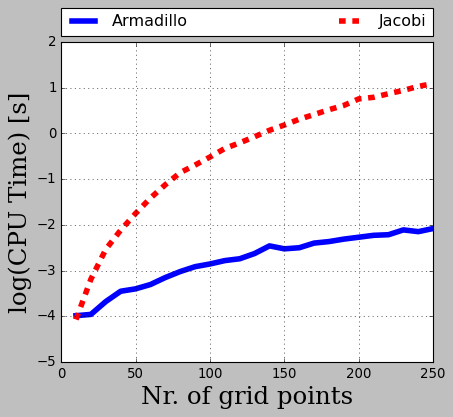

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize = (6, 5))
plt.style.use('classic')
plt.plot(n, np.log10(tim_arm), 'b-',linewidth = 5, label = "Armadillo")
plt.plot(n, np.log10(tim_jac), 'r--',linewidth = 5, label = "Jacobi")
plt.xlabel("Nr. of grid points", fontname = "serif", fontsize = 22)
plt.ylabel("log(CPU Time) [s]", fontname = "serif", fontsize = 22)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
plt.show()
save_fig('arma_vs_jacobi')

In [71]:
N       = 250
tmp_arm = np.zeros(N)
tmp_jac = np.zeros(N)

with open(data_path("Result_eigenval_2el_{}_10.0_0.25.txt".format(N)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm[line_num-1] = float(words[0])
            tmp_jac[line_num-1] = float(words[1])

print(tmp_arm[0])
print((tmp_arm[0]-0.6250*2)/(2*0.6250))

#print(tmp_arm[0])
#print((tmp_arm[0]-0.1750*2)/(2*0.1750))

#print(tmp_arm[0])
#print((tmp_arm[0]-0.0822*2)/(2*0.0822))

1.2498678149868776
-0.00010574801049791915


0.019918838032533498
1.0000743362923237


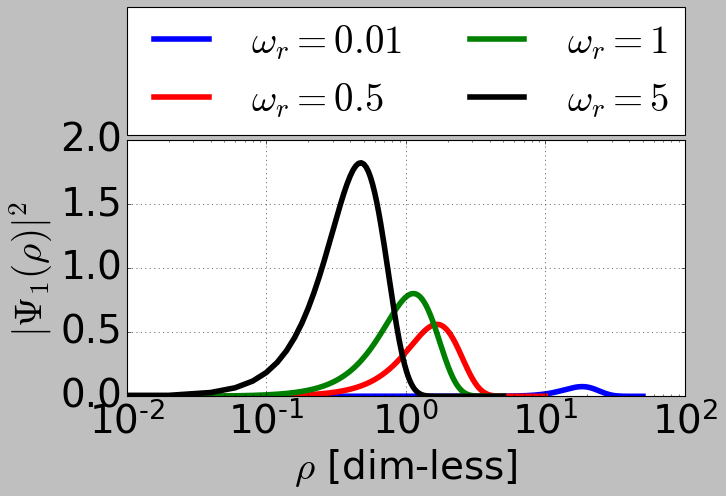

In [98]:
eigvec_arm1_250 = np.zeros(250+2)
eigvec_jac1_250 = np.zeros(250+2)
eigvec_arm2_250 = np.zeros(250+2)
eigvec_jac2_250 = np.zeros(250+2)
eigvec_arm3_250 = np.zeros(250+2)
eigvec_jac3_250 = np.zeros(250+2)
eigvec_arm4_250 = np.zeros(250+2)
eigvec_jac4_250 = np.zeros(250+2)

rhom = 50
rho  = np.linspace(0, rhom, 252)
n3   = np.arange(0,250+2,1)

tmp_arm = np.zeros(250)
tmp_jac = np.zeros(250)
    
with open(data_path("Result_eigenvec_2el_250_{}_0.01.txt".format(50)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm[line_num-1] = float(words[0])
            tmp_jac[line_num-1] = float(words[1])
#area1                 = np.trapz(np.abs(tmp_arm)**2, rho[1:-1])                
eigvec_arm1_250[1:-1] = np.abs(tmp_arm)**2/np.trapz(np.abs(tmp_arm)**2, rho[1:-1]) 
#area2                 = np.trapz(eigvec_arm1_250, rho) 
eigvec_jac1_250[1:-1] = np.abs(tmp_jac)**2/np.trapz(np.abs(tmp_jac)**2, rho[1:-1])

rhom = 10
rho2 = np.linspace(0, rhom, 252)
tmp_arm2 = np.zeros(250)
tmp_jac2 = np.zeros(250)
with open(data_path("Result_eigenvec_2el_250_{}_0.5.txt".format(10)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words                = line_string.split()
            tmp_arm2[line_num-1] = float(words[0])
            tmp_jac2[line_num-1] = float(words[1])
                
eigvec_arm2_250[1:-1] = np.abs(tmp_arm2)**2/np.trapz(np.abs(tmp_arm2)**2, rho2[1:-1])
eigvec_jac2_250[1:-1] = np.abs(tmp_jac2)**2/np.trapz(np.abs(tmp_jac2)**2, rho2[1:-1]) 

rhom = 5
rho3 = np.linspace(0, rhom, 252)
tmp_arm3 = np.zeros(250)
tmp_jac3 = np.zeros(250)
with open(data_path("Result_eigenvec_2el_250_{}_1.txt".format(5)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm3[line_num-1] = float(words[0])
            tmp_jac3[line_num-1] = float(words[1])
                
eigvec_arm3_250[1:-1] = np.abs(tmp_arm3)**2/np.trapz(np.abs(tmp_arm3)**2, rho3[1:-1])
eigvec_jac3_250[1:-1] = np.abs(tmp_jac3)**2/np.trapz(np.abs(tmp_jac3)**2, rho3[1:-1])

rhom = 5
rho4 = np.linspace(0, rhom, 252)
tmp_arm4 = np.zeros(250)
tmp_jac4 = np.zeros(250)
with open(data_path("Result_eigenvec_2el_250_{}_5.txt".format(5)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm4[line_num-1] = float(words[0])
            tmp_jac4[line_num-1] = float(words[1])
area1                 = np.trapz(np.abs(tmp_arm4)**2, rho4[1:-1])                 
eigvec_arm4_250[1:-1] = np.abs(tmp_arm4)**2/np.trapz(np.abs(tmp_arm4)**2, rho4[1:-1])
area2                 = np.trapz(eigvec_arm4_250, rho4) 
eigvec_jac4_250[1:-1] = np.abs(tmp_jac4)**2/np.trapz(np.abs(tmp_jac4)**2, rho4[1:-1])
print(area1)
print(area2)

plt.figure(figsize = (9, 4))
plt.style.use('classic')
plt.semilogx(rho, eigvec_jac1_250, 'b',linewidth = 5, label = r"$\omega_r=0.01$")
plt.semilogx(rho2, eigvec_jac2_250, 'r',linewidth = 5, label = r"$\omega_r=0.5$")
plt.semilogx(rho3, eigvec_jac3_250, 'g',linewidth = 5, label = r"$\omega_r=1$")
plt.semilogx(rho4, eigvec_jac4_250, 'k',linewidth = 5, label = r"$\omega_r=5$")
plt.xlabel(r"$\rho$ [dim-less]", fontsize = 35)
plt.ylabel(r"$|\Psi_1(\rho)|^2$",  fontsize = 35)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 35)
save_fig('2el_eigvec')
plt.show()

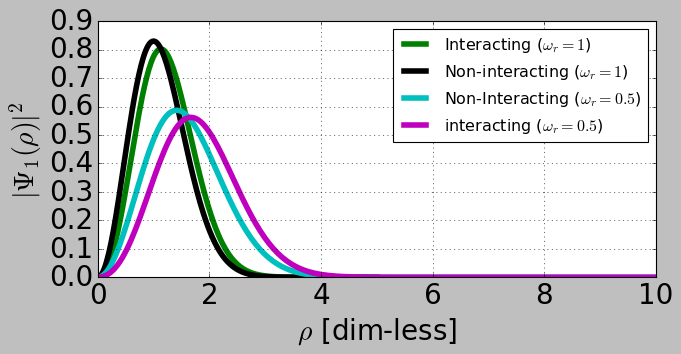

In [100]:
eigvec_arm1_250 = np.zeros(250+2)
eigvec_jac1_250 = np.zeros(250+2)
eigvec_arm2_250 = np.zeros(250+2)
eigvec_jac2_250 = np.zeros(250+2)
eigvec_arm3_250 = np.zeros(250+2)
eigvec_jac3_250 = np.zeros(250+2)
eigvec_arm4_250 = np.zeros(250+2)
eigvec_jac4_250 = np.zeros(250+2)

rhom = 10
rho  = np.linspace(0, rhom, 252)
n3   = np.arange(0,250+2,1)

tmp_arm = np.zeros(250)
tmp_jac = np.zeros(250)
    
with open(data_path("Result_eigenvec_2el_250_{}_0.5_non.txt".format(10)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm[line_num-1] = float(words[0])
            tmp_jac[line_num-1] = float(words[1])
                
eigvec_arm1_250[1:-1] = np.abs(tmp_arm)**2/np.trapz(np.abs(tmp_arm)**2, rho[1:-1])
eigvec_jac1_250[1:-1] = np.abs(tmp_jac)**2/np.trapz(np.abs(tmp_jac)**2, rho[1:-1])

rhom = 10
rho2 = np.linspace(0, rhom, 252)
tmp_arm2 = np.zeros(250)
tmp_jac2 = np.zeros(250)
with open(data_path("Result_eigenvec_2el_250_{}_0.5.txt".format(10)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words                = line_string.split()
            tmp_arm2[line_num-1] = float(words[0])
            tmp_jac2[line_num-1] = float(words[1])
                
eigvec_arm2_250[1:-1] = np.abs(tmp_arm2)**2/np.trapz(np.abs(tmp_arm2)**2, rho2[1:-1])
eigvec_jac2_250[1:-1] = np.abs(tmp_jac2)**2/np.trapz(np.abs(tmp_jac2)**2, rho2[1:-1]) 

rhom = 5
rho3 = np.linspace(0, rhom, 252)
tmp_arm3 = np.zeros(250)
tmp_jac3 = np.zeros(250)
with open(data_path("Result_eigenvec_2el_250_{}_1.txt".format(5)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm3[line_num-1] = float(words[0])
            tmp_jac3[line_num-1] = float(words[1])
                
eigvec_arm3_250[1:-1] = np.abs(tmp_arm3)**2/np.trapz(np.abs(tmp_arm3)**2, rho3[1:-1])
eigvec_jac3_250[1:-1] = np.abs(tmp_jac3)**2/np.trapz(np.abs(tmp_jac3)**2, rho3[1:-1])

rhom = 5
rho4 = np.linspace(0, rhom, 252)
tmp_arm4 = np.zeros(250)
tmp_jac4 = np.zeros(250)
with open(data_path("Result_eigenvec_1el_250_5_.txt".format(5)), "r") as results:
        
    for line_num, line_string in enumerate(results):
            
        if (line_num > 0):
                
            words               = line_string.split()
            tmp_arm4[line_num-1] = float(words[0])
            tmp_jac4[line_num-1] = float(words[1])
                
eigvec_arm4_250[1:-1] = np.abs(tmp_arm4)**2/np.trapz(np.abs(tmp_arm4)**2, rho4[1:-1])
eigvec_jac4_250[1:-1] = np.abs(tmp_jac4)**2/np.trapz(np.abs(tmp_jac4)**2, rho4[1:-1])
        
plt.figure(figsize = (9, 4))
plt.style.use('classic')
plt.plot(rho3, eigvec_jac3_250, 'g',linewidth = 5, label = r"Interacting ($\omega_r=1$)")
plt.plot(rho4, eigvec_jac4_250, 'k',linewidth = 5, label = r"Non-interacting ($\omega_r=1$)")
plt.plot(rho, eigvec_jac1_250, 'c',linewidth = 5, label = r"Non-Interacting ($\omega_r=0.5$)")
plt.plot(rho2, eigvec_jac2_250, 'm',linewidth = 5, label = r"interacting ($\omega_r=0.5$)")
plt.xlabel(r"$\rho$ [dim-less]", fontsize = 25)
plt.ylabel(r"$|\Psi_1(\rho)|^2$",  fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend()
plt.grid()
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 35)
save_fig('2el_eigvec_interact')
plt.show()